In [4]:
import shap
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from shapleycomposition import ShapleyExplainer
from composition_stats import ilr, sbp_basis
from bifurc_tree import create_tree_from_sbp, init_graph, build_graph

def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))

In [5]:
K = 10         #index of the instance you want to test in the test set
N_class = 3    #number of class, the dimension of the simplex is therefore N_class-1


#load the dataset and split into a training and testing set
X, Y = datasets.load_iris(return_X_y=True)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#train an SVM classifier
svc_linear = svm.SVC(kernel='rbf', probability=True)
svc_linear.fit(X_train, Y_train)
print_accuracy(svc_linear.predict)

#choose an Aitchison orthonormal basis by setting a sequential binary partition matrix.
#If None, the basis obtained with the gram-schmidt procedure is used
sbpmatrix=np.array([[1,1,-1],[1,-1,0]])
basis = np.flip(sbp_basis(sbpmatrix), axis=0)

# explain all the predictions in the test set
explainer = ShapleyExplainer(svc_linear.predict_proba, X_train, 3, sbpmatrix=sbpmatrix)
(shapley, base) = explainer.explain_instance(np.array(X_test[K]))

print("True label of the tested instance: ", end="")
print(Y_test[K])

#get the model prediction for the Kth instance of the test partition
pred = svc_linear.predict_proba(X_test[K].reshape(1,-1))
print("Prediction on the simplex: ",end="")
print(pred)
ilr_pred = ilr(pred, basis=basis)
print("Prediction in the ILR space: ",end="")
print(ilr_pred)

#The sum of the base distribution and the shapley composition in the ILR space is equal to the predicted probability distribution
sum_shap_base = np.array(shapley).sum(axis=0)+base
print("Sum of the shapley composition and the base distribution in the ILR space: ", end="")
print(sum_shap_base)



Accuracy = 100.0%
(2,)
test
True label of the tested instance: 2
Prediction on the simplex: [[0.00844956 0.08614156 0.90540889]]
Prediction in the ILR space: [-1.64181571 -2.86862497]
Sum of the shapley composition and the base distribution in the ILR space: [-1.64181574 -2.86862493]


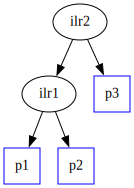

In [7]:
#Print the bifurcation tree corresponding to the chosen Aitchison basis

root = create_tree_from_sbp(sbpmatrix, N_class)

#Visualise the tree using graphviz
graph = init_graph()
build_graph(root, graph)
graph       #plot the bifurcation tree


<function matplotlib.pyplot.show(close=None, block=None)>

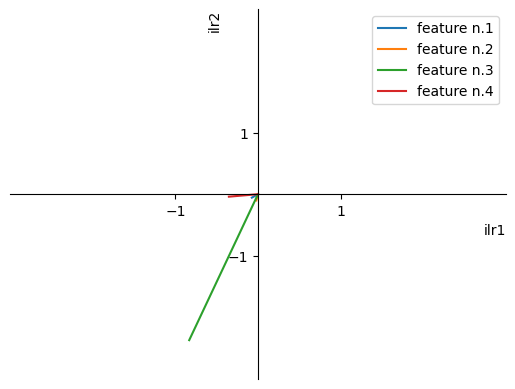

In [21]:
#Select the which ilr component you want to visualise and plot the corresponding plan
plot1_ilr = 1
plot2_ilr = 2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('ilr'+str(plot1_ilr), loc='right')
ax.set_ylabel('ilr'+str(plot2_ilr), loc='top')

for i,s in enumerate(shapley):
    plt.plot([0,s[plot1_ilr-1]],[0,s[plot2_ilr-1]], label='feature n.'+str(i+1))
    #plt.text(s[plot1_ilr-1],s[plot2_ilr-1], str(i+1), fontsize='large')
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.xticks([-1,1])
plt.yticks([-1,1])
plt.legend()
plt.show

In [2]:
# origin = np.array([[0,0, 0, 0],[0,0, 0, 0]])
# x1, y1 = [0,0], [0,10]
# x2, y2 = [0,10], [0,-10/sqrt(3)]
# x3, y3 = [0,-10], [0,-10/sqrt(3)]

# plt.figure(figsize=(7,7))
# plt.plot(x1,y1,'b--',x2,y2,'b--',x3,y3,'b--')
# plt.text(1,1/sqrt(3),'setosa', ha='center', va='center')
# plt.text(-1,1/sqrt(3),'versicolor', ha='center', va='center')
# plt.text(0,-2,'virginica', ha='center', va='center')

# for i,p in enumerate(shap):
#     plt.plot([0,p[0]],[0,p[1]])
#     plt.text(p[0],p[1], str(i+1))
# plt.xlim((-4,4))
# plt.ylim((-4,4))
# plt.xlabel("First ILR component")
# plt.ylabel("SecondILR component")
# plt.show()

# plt.figure(figsize=(7,7))
# plt.plot(x1,y1,'b--',x2,y2,'b--',x3,y3,'b--')
# plt.text(1,1/sqrt(3),'setosa', ha='center', va='center')
# plt.text(-1,1/sqrt(3),'versicolor', ha='center', va='center')
# plt.text(0,-2,'virginica', ha='center', va='center')

# plt.scatter(base[0],base[1],marker="+",c='black',s=50)
# plt.scatter(pred[0],pred[1],marker="x",c='black',s=50)

# s = base
# lbl="1"
# for i,p in enumerate(shap):
#     plt.plot([s[0],(s+p)[0]],[s[1],(s+p)[1]])
#     plt.text((s+p)[0],(s+p)[1],lbl)
#     lbl += ","+str(i+2)
#     s += p

# print(s)
# print(pred)
# plt.xlim((-4,4))
# plt.ylim((-4,4))
# plt.xlabel("First ILR component")
# plt.ylabel("SecondILR component")
# plt.show()

# print(Y_test[K])


In [ ]:
# origin = np.array([[0,0, 0, 0],[0,0, 0, 0]])
# x1, y1 = [0,0], [0,10]
# x2, y2 = [0,10], [0,-10/sqrt(3)]
# x3, y3 = [0,-10], [0,-10/sqrt(3)]

# plt.figure(figsize=(7,7))
# plt.plot(x1,y1,'b--',x2,y2,'b--',x3,y3,'b--')
# plt.text(1,1/sqrt(3),'setosa', ha='center', va='center')
# plt.text(-1,1/sqrt(3),'versicolor', ha='center', va='center')
# plt.text(0,-2,'virginica', ha='center', va='center')

# for i,p in enumerate(shap):
#     plt.plot([0,p[0]],[0,p[1]])
#     plt.text(p[0],p[1], str(i+1))
# plt.xlim((-4,4))
# plt.ylim((-4,4))
# plt.xlabel("First ILR component")
# plt.ylabel("SecondILR component")
# plt.show()

# plt.figure(figsize=(7,7))
# plt.plot(x1,y1,'b--',x2,y2,'b--',x3,y3,'b--')
# plt.text(1,1/sqrt(3),'setosa', ha='center', va='center')
# plt.text(-1,1/sqrt(3),'versicolor', ha='center', va='center')
# plt.text(0,-2,'virginica', ha='center', va='center')

# plt.scatter(base[0],base[1],marker="+",c='black',s=50)
# plt.scatter(pred[0],pred[1],marker="x",c='black',s=50)

# s = base
# lbl="1"
# for i,p in enumerate(shap):
#     plt.plot([s[0],(s+p)[0]],[s[1],(s+p)[1]])
#     plt.text((s+p)[0],(s+p)[1],lbl)
#     lbl += ","+str(i+2)
#     s += p

# print(s)
# print(pred)
# plt.xlim((-4,4))
# plt.ylim((-4,4))
# plt.xlabel("First ILR component")
# plt.ylabel("SecondILR component")
# plt.show()

# print(Y_test[K])
